# Penguin Classifier

# 🐧 Business Problem Statement

## Objective  
Wildlife researchers and conservationists often rely on species identification to monitor biodiversity, study behavioral patterns, and track population changes in penguin colonies. Manual classification of species based on visual inspection can be time-consuming, error-prone, and inefficient—especially in remote field environments.

This project aims to develop a **machine learning model** that can **accurately predict the species of a penguin** using measurable physical attributes such as:

- `culmen_length_mm`
- `culmen_depth_mm`
- `flipper_length_mm`
- `body_mass_g`
- `sex`
- `island`

## 📈 Business Value  
By automating the species classification process:

- 🧬 **Researchers** can save time in fieldwork and focus more on ecological analysis.  
- 📊 **Data accuracy and consistency** are improved, reducing human error in labeling.  
- 🌍 **Conservation efforts** can be more effectively targeted by understanding species distribution and dynamics.

This tool can serve as a valuable asset in ecological research, wildlife management, and educational environments where species identification is crucial.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


##  Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.shape

(344, 7)

In [5]:
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [6]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [7]:
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [8]:
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [9]:
df['sex'].replace(".","MALE",inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [12]:
df.columns.tolist()

['species',
 'island',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

In [13]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(),inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(),inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(),inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(),inplace=True)
df['sex'].fillna(df['sex'].mode()[0],inplace=True)
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Data Visualization

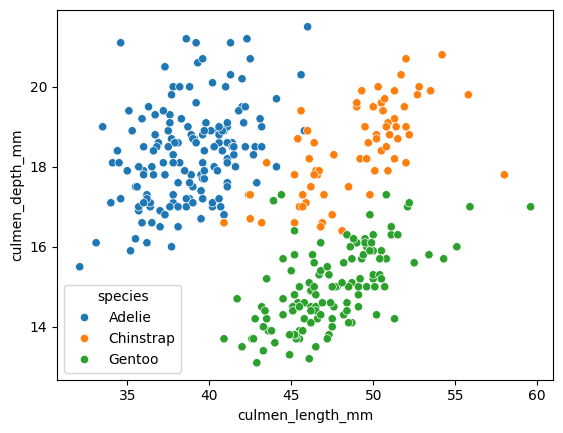

In [14]:
sns.scatterplot(x=df['culmen_length_mm'],y=df['culmen_depth_mm'],hue=df['species'])
plt.show()

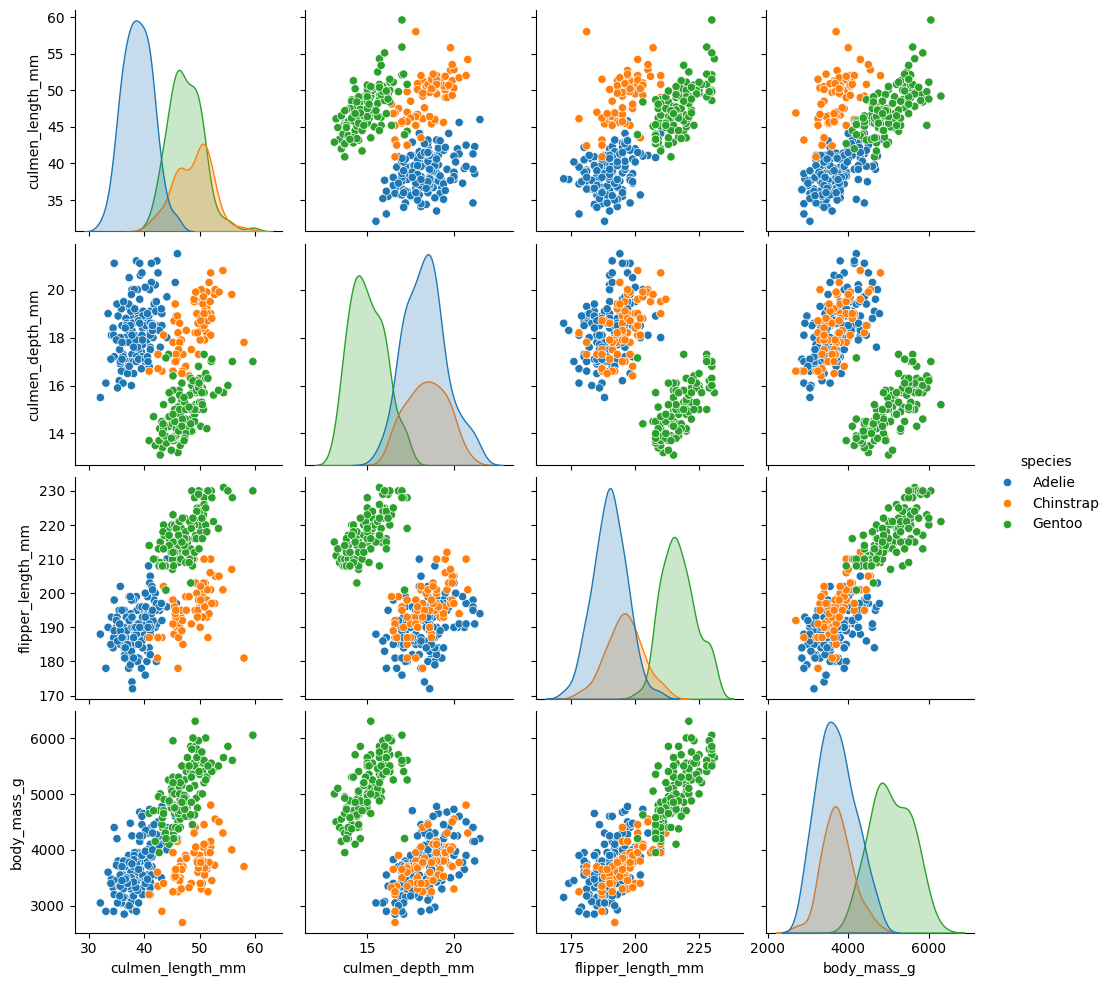

In [15]:
sns.pairplot(df,hue='species')
plt.show()

### Seperate X & y

In [16]:
X=pd.get_dummies(df.drop("species",axis=1),drop_first=True)
y=df['species']
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.10000,18.70000,181.000000,3750.000000,False,True,True
1,39.50000,17.40000,186.000000,3800.000000,False,True,False
2,40.30000,18.00000,195.000000,3250.000000,False,True,False
3,43.92193,17.15117,200.915205,4201.754386,False,True,True
4,36.70000,19.30000,193.000000,3450.000000,False,True,False


If you're using tree-based models (Decision Trees, Random Forest, XGBoost), you don’t need to drop columns.

If using linear models (Linear Regression, Logistic Regression, etc.), keeping all dummy columns causes multicollinearity → drop_first=True is recommended.


### train-test-split

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Modelling

In [18]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

ypred_train=model.predict(X_train)
ypred_test=model.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

print(f"Train accuracy is {accuracy_score(y_train,ypred_train)}")
print(f"Test accuracy is {accuracy_score(y_test,ypred_test)}")
print(f"CV score is {(cross_val_score(model,X_train,y_train,cv=5)).mean()}")

Train accuracy is 1.0
Test accuracy is 0.9855072463768116
CV score is 0.9636363636363636


In [19]:
X.columns.tolist()

['culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'island_Dream',
 'island_Torgersen',
 'sex_MALE']

In [20]:
y.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

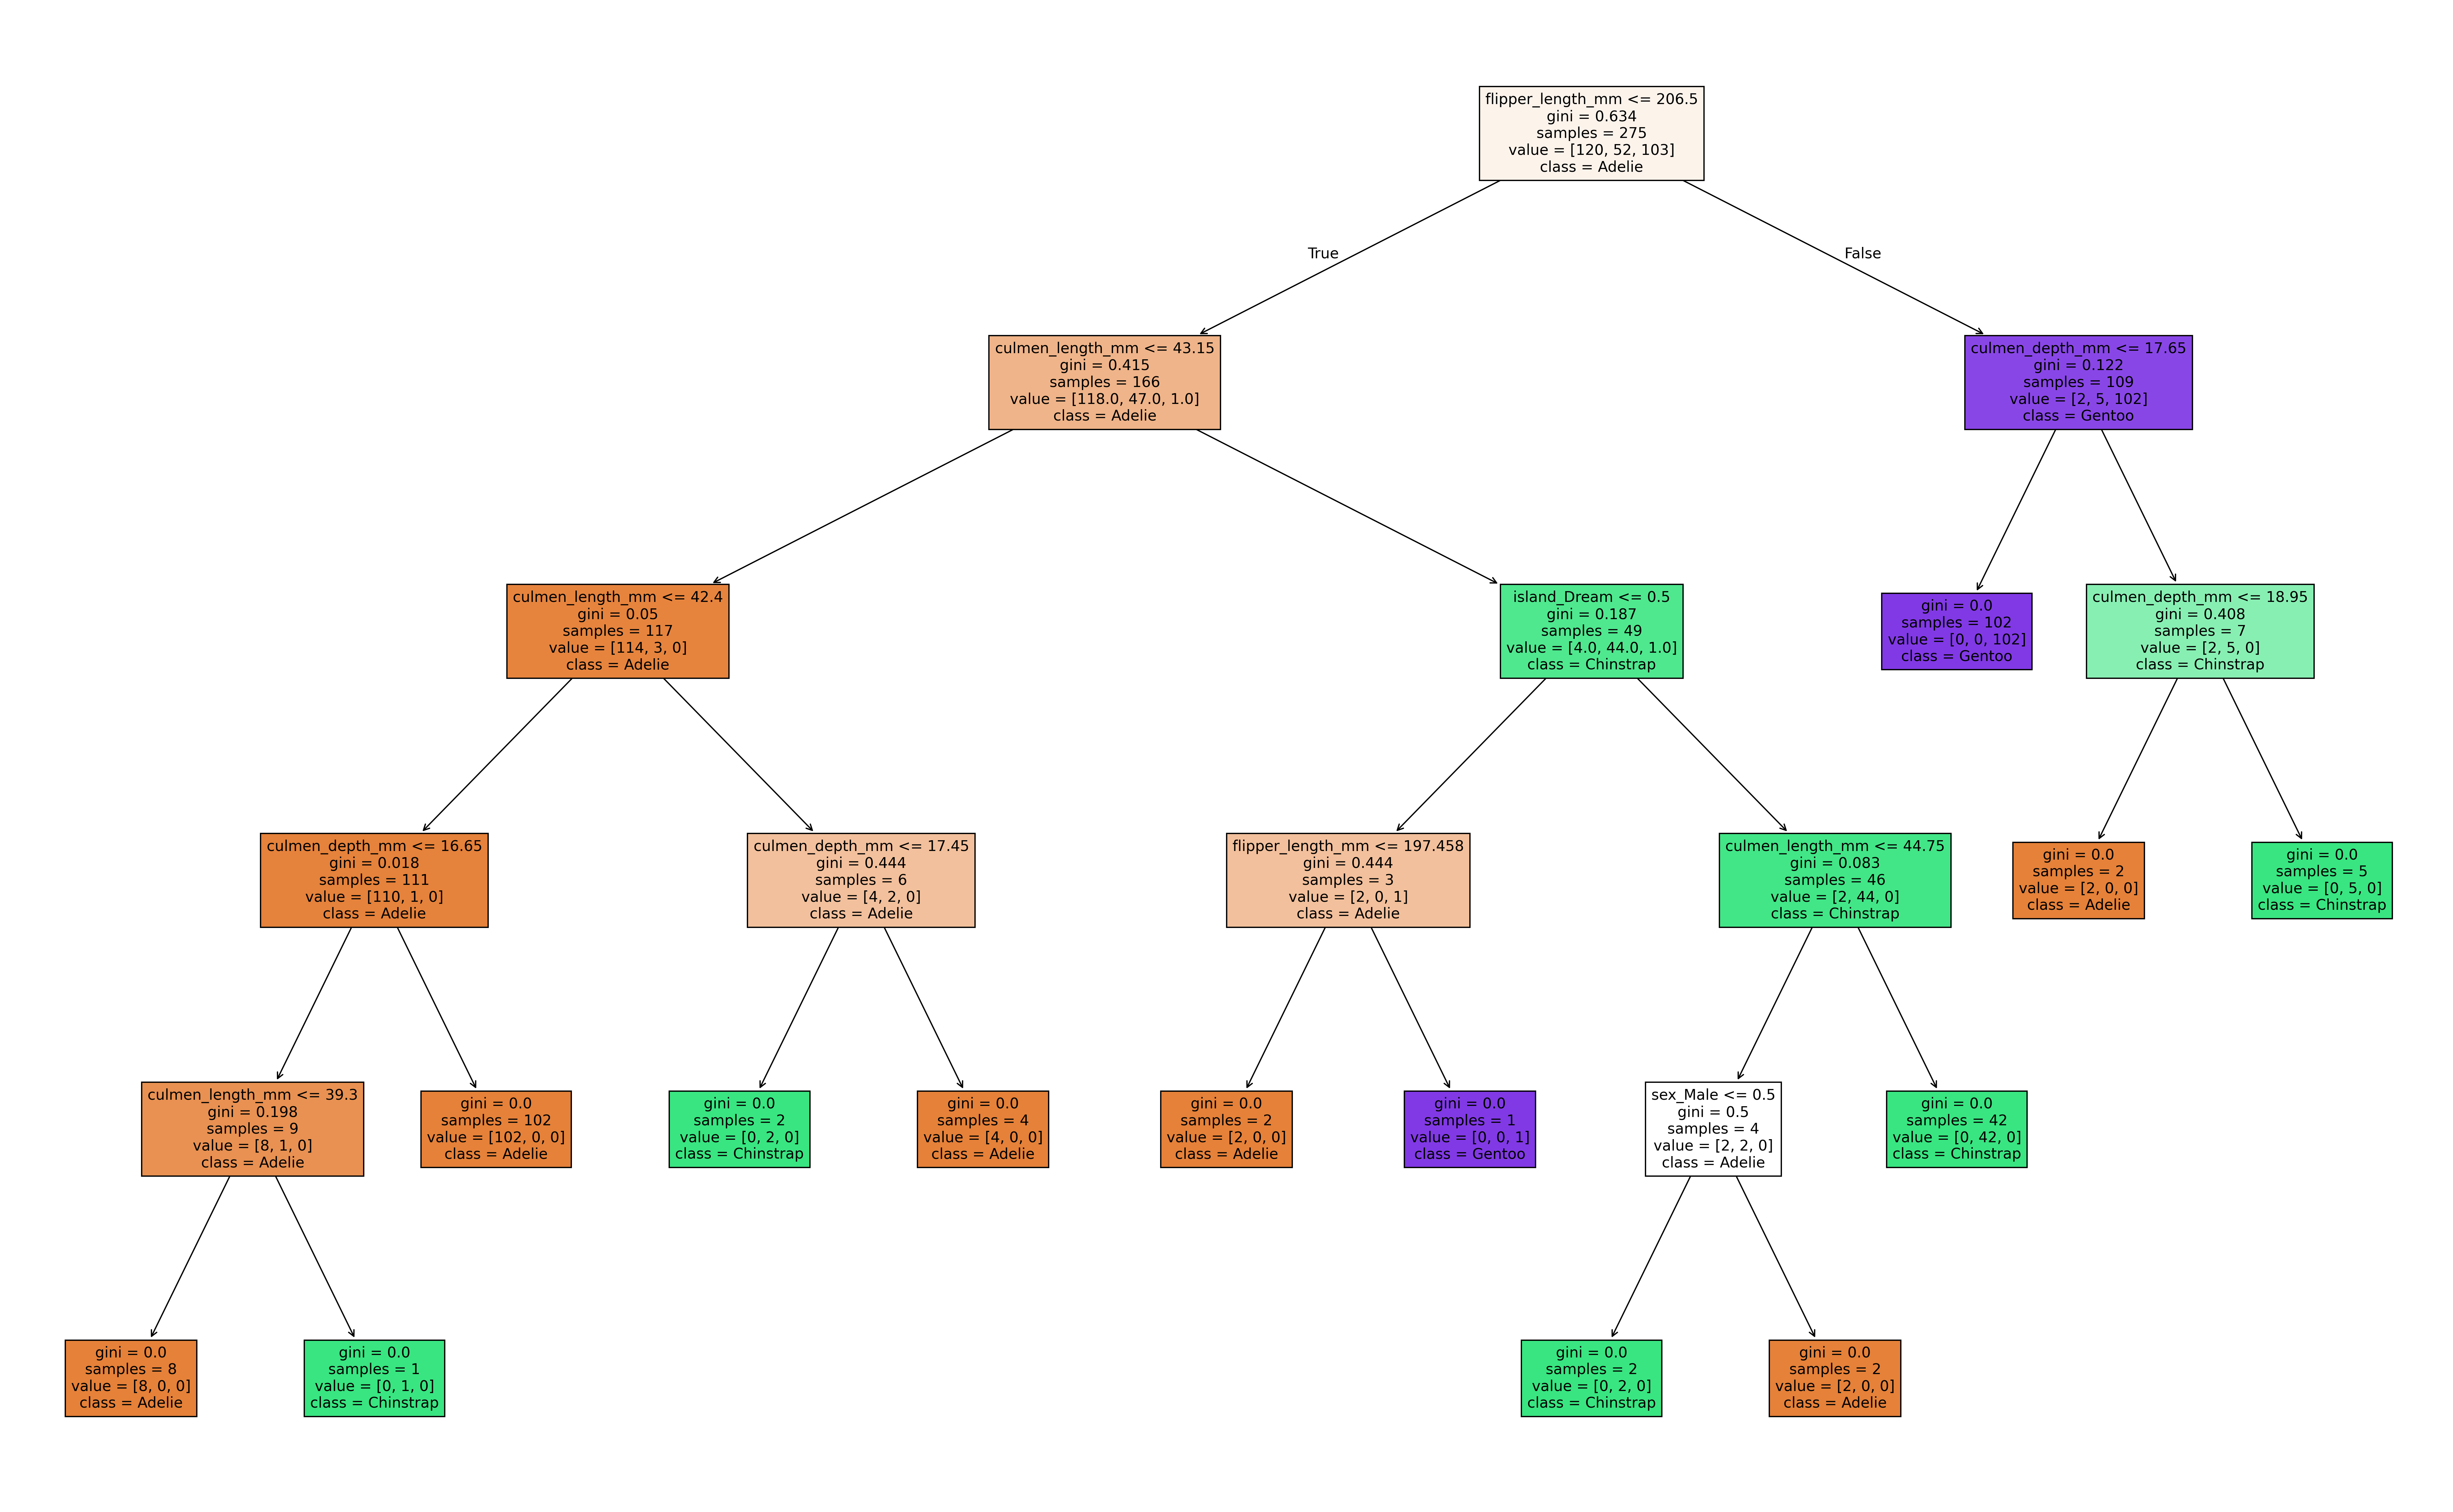

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(34,21),dpi=300)
plot_tree(model,
           filled=True,
            feature_names=['culmen_length_mm',
                             'culmen_depth_mm',
                             'flipper_length_mm',
                             'body_mass_g',
                             'island_Dream',
                             'island_Torgersen',
                             'sex_Male'],
             class_names=['Adelie', 'Chinstrap', 'Gentoo'])
plt.show()

## Hyperparameter Tuning

In [22]:
from sklearn.model_selection import GridSearchCV
estimator=DecisionTreeClassifier(random_state=42)
param_grid={"criterion":["gini","entropy"],
             "max_depth":[1,2,3,4,5]}
model=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
model.fit(X_train,y_train)
model.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [23]:
model.best_estimator_.feature_importances_

array([0.35198751, 0.06341945, 0.56036545, 0.        , 0.02422759,
       0.        , 0.        ])

## Important Features

In [24]:
features=pd.DataFrame(data=model.best_estimator_.feature_importances_,index=X.columns,columns=["Feature_Importance"])
imp_features=features[features['Feature_Importance']>0]
imp_features_list=imp_features.index.to_list()
imp_features_list

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'island_Dream']

## Final Model

In [25]:
X_imp=X[imp_features_list]
y_imp=y

X_train,X_test,y_train,y_test=train_test_split(X_imp,y_imp,test_size=0.2,random_state=42)

final_model=DecisionTreeClassifier(criterion="entropy",max_depth=5,random_state=42)
final_model.fit(X_train,y_train)

ypred_train=final_model.predict(X_train)
ypred_test=final_model.predict(X_test)

print(f"Train Accuracy score is {accuracy_score(y_train,ypred_train)}")
print(f"Test Accuracy score is {accuracy_score(y_test,ypred_test)}")
print(f"CV score is {(cross_val_score(final_model,X_train,y_train,cv=5)).mean()}")

Train Accuracy score is 1.0
Test Accuracy score is 0.9710144927536232
CV score is 0.9636363636363636


In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ypred_test)
cm

array([[30,  1,  1],
       [ 0, 16,  0],
       [ 0,  0, 21]], dtype=int64)

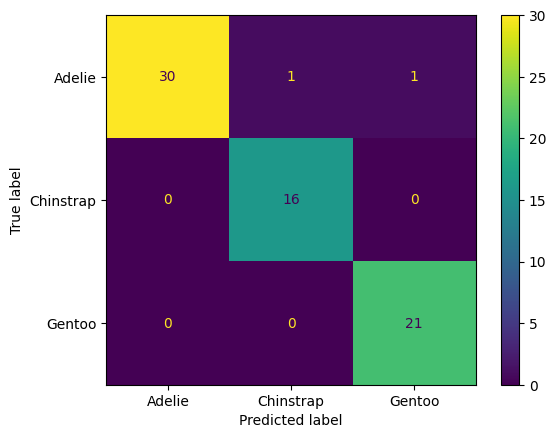

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels=df['species'].unique()).plot()
plt.show()